In [1]:
import requests
from webdriver_manager.chrome import ChromeDriverManager as CDM
from bs4 import BeautifulSoup
import cv2
import urllib
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pytesseract
from selenium import webdriver
import easyocr

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [3]:
browser = webdriver.Chrome(CDM().install(),options=options)
browser.maximize_window()
browser.implicitly_wait(10)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [C:\Users\nvnsl\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [4]:
try:
    browser.get("https://speedtest.net/")
    browser.switch_to.frame("google_ads_iframe_/6692/speedtest.net/stnext_leaderboard_0")
    x=browser.page_source
except Exception as e:
    print(e)
#print(x)

In [5]:
ad_number = 1

In [6]:
soup1=BeautifulSoup(x,'html.parser')
image=soup1.find_all('img')
#print(image)
#print('')
#print('Ad link:',image[0]['src'])
for i in image:
    print("URL: {}".format(i['src']))
#imglink=image[0]['src']

URL: https://tpc.googlesyndication.com/simgad/10491750437414009694?sqp=4sqPyQQrQikqJwhfEAEdAAC0QiABKAEwCTgDQPCTCUgAUAFYAWBfcAJ4AcUBLbKdPg&rs=AOga4qk8OFNPb7ZnMuNk9H9f6_OM5whz_A
URL: https://tpc.googlesyndication.com/pagead/images/abg/en.png
URL: https://tpc.googlesyndication.com/pagead/images/abg/icon.png
URL: https://securepubads.g.doubleclick.net/pagead/adview?ai=C774c9INlYbLrOIu-ogPjyaPoAuPyvohl87v5w4EOkdT_-IIYEAEgzrvkH2Dl0uaDvA6gAamgi74DyAECqQJDrOnLO82EPuACAKgDAcgDCKoE5AFP0MCwd5R5s_R2BIHeg5BgFod1rcCzaJjwCz1sJq0SRNGfKZTPjxXWtp0QPf5MrA4cKlaDc3t-5N955QAGsip7M4ffWe8TZxGwSkhcivgnxF5swmP6nLOfsA70J2VrZccCynjXp2drD7U0TLgmsY4wh8CE6YuJNW3mODz3OLwn5foarLAoc9h8e-qM8WnDRDqvhXZLaHCvi35F9rzCYkB0_bIVfPO1P8Q-bgXoWZQ-5b8lTGhVfHUwpP677JuQ0EFC6_KyUVPzZIS7e-3_33rMt_cPbD9WOEEvPU8zrQ9Is6jqBRnABLqrk4jbA-AEAZIFBAgEGAGSBQQIBRgEkgUECAUYGJIFBQgFGKgBoAYCgAee1oZkqAfw2RuoB_LZG6gHjs4bqAeT2BuoB7oGqAfulrECqAfVyRuoB6a-G9gHAfIHBBCN2gXSCAcIiGEQARgdgAoDyAsB2BMN0BUBgBcBshceChwIABIUcHViLTMxMjE1NjM0NDUxODIxNDUYgocQ&sigh=OW

In [7]:
check = 0
img_list=[]

In [8]:
for i in image:
    try:
        urllib.request.urlretrieve(i['src'], 'speedtest_ad{}.png'.format(ad_number)) 
        img = PIL.Image.open("speedtest_ad{}.png".format(ad_number))
        check+=1
        img_list.append(img)
        ad_number+=1
    except Exception as e:
        print(e)
        continue
print(img_list) 

try:
    img.save('pdf.pdf', "PDF" ,resolution=100.0, save_all=True, append_images=img_list)
except Exception as e:
    print(e)

cannot identify image file 'speedtest_ad4.png'
[<PIL.PngImagePlugin.PngImageFile image mode=P size=728x90 at 0x1F8FCA219C8>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=192x30 at 0x1F8FCA14748>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=15x15 at 0x1F8FCA1E4C8>]
cannot save mode RGBA


In [9]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [10]:
for j in range(1,check+1):
    try:
        data_eng = pytesseract.image_to_string(Image.open("speedtest_ad{}.png".format(j)), lang='eng')#process_image("sample.png", "eng")
        print(data_eng)
        file = open("text_of_ad{}.txt".format(j), "w+")
        file.write(data_eng)
        file.close()
        print("done")
    except Exception as e:
        print(e)
        continue

Plate Laser Cutting Machine yale. © Aseries
Working On All Metal y 7

done
Ads by Google @

done

done


In [11]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


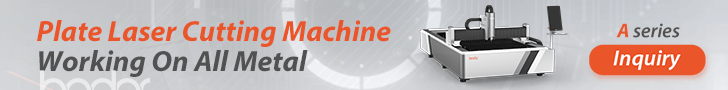

In [12]:
im = PIL.Image.open("speedtest_ad1.png")
im

In [13]:
bounds = reader.readtext('speedtest_ad1.png')
bounds

[([[33, 15], [397, 15], [397, 53], [33, 53]],
  'Plate Laser Cutting Machine',
  0.9962102691161223),
 ([[631, 21], [683, 21], [683, 41], [631, 41]], 'series', 0.9999325470424157),
 ([[33, 40], [315, 40], [315, 84], [33, 84]],
  'Working On All Metal',
  0.9411783998837682),
 ([[607, 45], [684, 45], [684, 76], [607, 76]], 'Inquiry', 0.8938770619727963)]

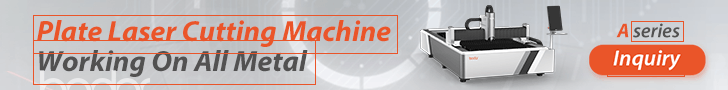

In [14]:
def draw_boxes(image, bounds, color='white', width=1):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], width=width)
    return image

draw_boxes(im, bounds)

In [4]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt